In [5]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [6]:
HRDB = pd.read_csv('HRDB_cleaned.csv')
HRDB


,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField
0,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences
1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,27,0,Travel_Rarely,591,Research & Development,2,1,Medical
2,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences
3,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences
4,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1939,1,Female,47,4,1,Research Scientist,3,Single,2432,15318,3,1,14,3,1,0,8,2,3,4,1,0,3,32,1,Travel_Frequently,238,Research & Development,5,2,Life Sciences
1466,1967,1,Male,63,3,2,Sales Executive,4,Married,5617,21075,1,1,11,3,3,0,10,4,3,10,7,0,8,31,1,Travel_Frequently,754,Sales,26,4,Marketing
1467,1968,1,Male,66,3,3,Sales Executive,1,Single,10448,5843,6,1,13,3,2,0,15,2,2,2,2,2,2,53,1,Travel_Rarely,1168,Sales,24,4,Life Sciences
1468,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,1,14,3,2,3,4,3,4,2,2,2,2,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical


 # Career Growth and Job Stability
 ### 1. KPI- Average Years Since Last Promotion by Attrition Status

,Attrition Status,YearsSinceLastPromotion
0,Stayed,2.23
1,Left,1.95


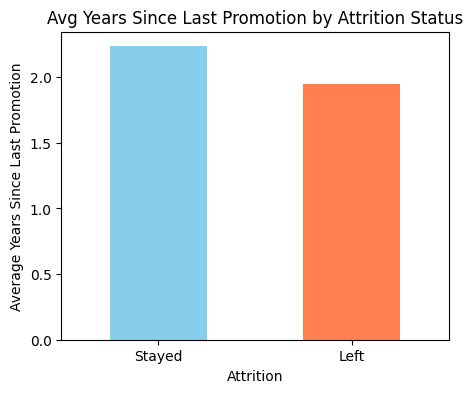

<Figure size 640x480 with 0 Axes>

In [ ]:
# average Years Since Last Promotion by Attrition status
# Let's map Attrition 0/1 to meaningful labels
attrition_map = {0: 'Stayed', 1: 'Left'}

avg_promotion_years = HRDB.groupby('Attrition')['YearsSinceLastPromotion'].mean().round(2).reset_index()
avg_promotion_years['Attrition Status'] = avg_promotion_years['Attrition'].map(attrition_map)
avg_promotion_years = avg_promotion_years[['Attrition Status', 'YearsSinceLastPromotion']]
display(avg_promotion_years)

# For plotting, also use mapped index names
avg_years_since_promotion = HRDB.groupby("Attrition")["YearsSinceLastPromotion"].mean()
avg_years_since_promotion.index = avg_years_since_promotion.index.map(attrition_map)

plt.figure(figsize=(5, 4))
avg_years_since_promotion.plot(kind="bar", color=["skyblue", "coral"])
plt.ylabel("Average Years Since Last Promotion")
plt.title("Avg Years Since Last Promotion by Attrition Status")
plt.xticks(rotation=0)
plt.show()


Conclusion- In general, employees who leave DO NOT have longer gaps between promotions. The issue is not being stuck in an entry level position.

### 2. How years at company and years in current role influence attrition rate. 

,YearsAtCompany_Group,Attrition Rate (%)
0,<2,34.9
1,2-5,15.5
2,6-10,12.3
3,11-15,6.5
4,16-20,6.9
5,21+,12.1


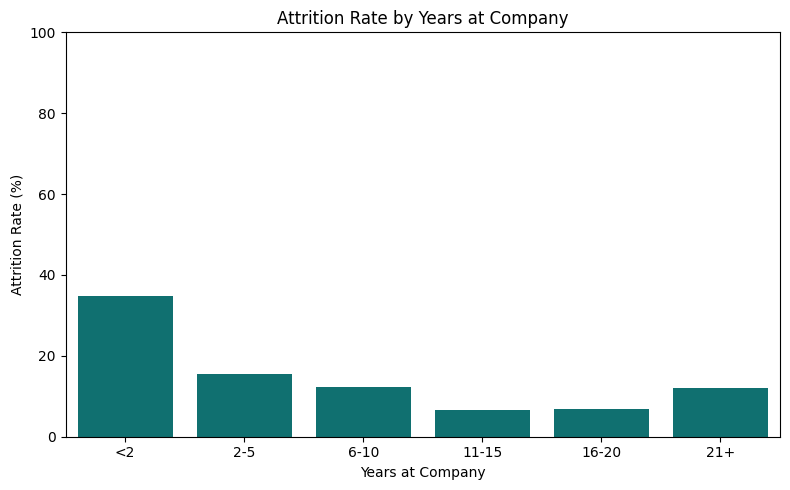

In [ ]:
# Analyze years at company influence on attrition rate

# Create bins & labels for "YearsAtCompany"
max_year_company = HRDB['YearsAtCompany'].max()
years_at_company_bins = [0, 2, 6, 11, 16, 21, max_year_company + 1]
years_at_company_labels = ['<2', '2-5', '6-10', '11-15', '16-20', '21+']

HRDB['YearsAtCompany_Group'] = pd.cut(
    HRDB['YearsAtCompany'],
    bins=years_at_company_bins,
    labels=years_at_company_labels,
    right=False,
    include_lowest=True
)

# Calculate attrition rate for each bin
attrition_col = 'Attrition'
attrition_by_company_years = HRDB.groupby('YearsAtCompany_Group', observed=True)[attrition_col].mean().reset_index()
attrition_by_company_years['Attrition Rate (%)'] = (attrition_by_company_years[attrition_col] * 100).round(1)
attrition_by_company_years = attrition_by_company_years.drop(columns=[attrition_col])
display(attrition_by_company_years)

plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_by_company_years,
    x='YearsAtCompany_Group',
    y='Attrition Rate (%)',
    color='teal'
)
plt.title('Attrition Rate by Years at Company')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Years at Company')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Conclusion- Newcomers leave more frequently. The longer they stay, the less likely for them to leave. This is in-line with attrition rates by age groups.

,YearsInCurrentRole_Group,Attrition Rate (%)
0,<2,27.9
1,2-4,16.2
2,5-7,11.5
3,8+,7.6


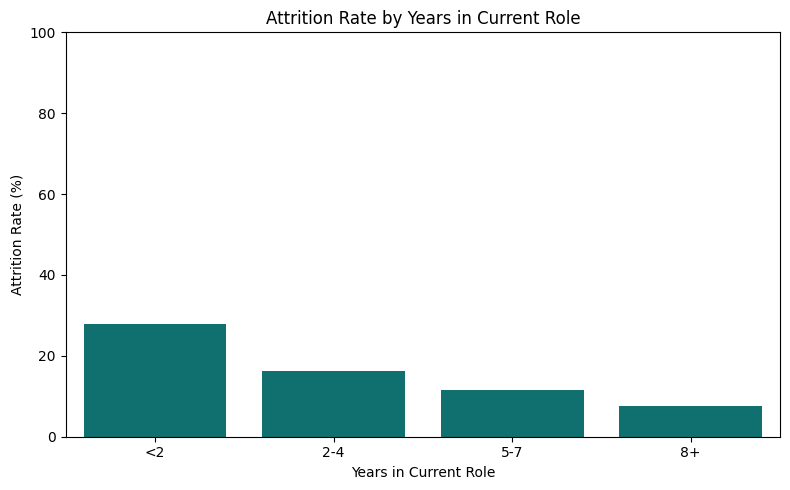

In [11]:
# Analyze years in current role influence on attrition rate
# Create appropriate bins and labels for years in current role

max_year_role = HRDB['YearsInCurrentRole'].max()

# Bins: <2, 2-4, 5-7, 8+
years_in_role_bins = [0, 2, 5, 8, max_year_role + 1]
years_in_role_labels = ['<2', '2-4', '5-7', '8+']

HRDB['YearsInCurrentRole_Group'] = pd.cut(
    HRDB['YearsInCurrentRole'],
    bins=years_in_role_bins,
    labels=years_in_role_labels,
    right=False,
    include_lowest=True
)

attrition_by_role_years = HRDB.groupby('YearsInCurrentRole_Group', observed=True)[attrition_col].mean().reset_index()
attrition_by_role_years['Attrition Rate (%)'] = (attrition_by_role_years[attrition_col] * 100).round(1)
attrition_by_role_years = attrition_by_role_years.drop(columns=[attrition_col])
display(attrition_by_role_years)

plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_by_role_years,
    x='YearsInCurrentRole_Group',
    y='Attrition Rate (%)',
    color='teal'
)
plt.title('Attrition Rate by Years in Current Role')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Years in Current Role')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


 Conclusion- the more people stay in their role -the less likely for them to leave. Most attrition is for New in the company and new in their role = under 5 years.
### Suggestion: 
##### Consider investing more in finding a good fit for entry level roles, managing expectations, and investing in the young employees at starting level


### 3. Attrition rate by job level 


,JobLevel,Attrition Rate (Turnover %)
0,1,26.3
1,2,9.7
2,3,14.7
3,4,4.7
4,5,7.2


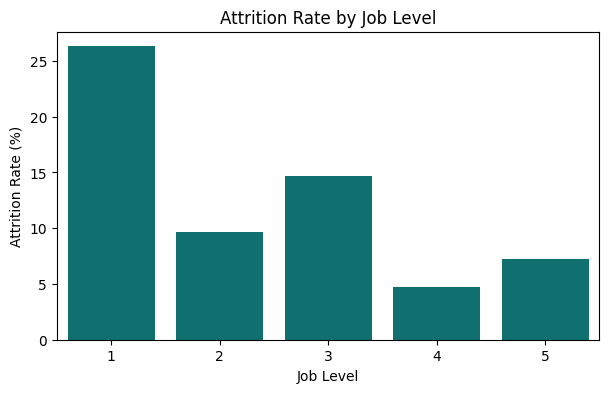

In [12]:

# Calculate average attrition rate by Job Level
# First, define column names used for clarity and error reduction based on previous error output
job_level_col = 'JobLevel'
attrition_col = 'Attrition'

# Calculate attrition rate per job level
avg_attrition_joblevel = HRDB.groupby(job_level_col)[attrition_col].mean().reset_index()
avg_attrition_joblevel['Attrition Rate (Turnover %)'] = (avg_attrition_joblevel[attrition_col] * 100).round(1)
# Drop original attrition column for clearer table
avg_attrition_joblevel = avg_attrition_joblevel.drop(columns=[attrition_col])

# Display as table
display(avg_attrition_joblevel)

# Visualize: Barplot
plt.figure(figsize=(7,4))
sns.barplot(
    data=avg_attrition_joblevel,
    x=job_level_col,
    y='Attrition Rate (Turnover %)',
    color='teal'
)
plt.title('Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.show()


 Conclusion- Job Level 1-young employees at entry level jobs= highest attrition. This is normal and expected in most fields and companies.

Job level 3 attrition rates are more concerning as these are the people who are more mature, experienced, and knowledgable. 

,JobLevel,YearsSinceLastPromotion
0,1,1.19
1,2,1.89
2,3,3.35
3,4,4.84
4,5,4.59


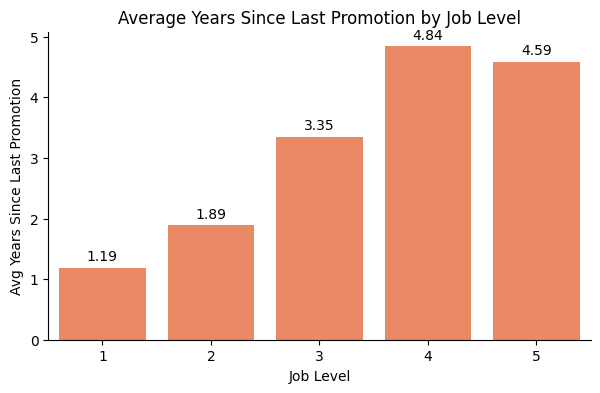

In [16]:
# Calculate average years since last promotion by job level

promotion_col = 'YearsSinceLastPromotion'

# Group by JobLevel and calculate average YearsSinceLastPromotion
avg_promotion_by_joblevel = HRDB.groupby(job_level_col)[promotion_col].mean().reset_index()
avg_promotion_by_joblevel[promotion_col] = avg_promotion_by_joblevel[promotion_col].round(2)

# Display the table
display(avg_promotion_by_joblevel)

# Visualize: Barplot
plt.figure(figsize=(7,4))
barplot = sns.barplot(
    data=avg_promotion_by_joblevel,
    x=job_level_col,
    y=promotion_col,
    color='coral'
)
plt.title('Average Years Since Last Promotion by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Avg Years Since Last Promotion')
plt.xticks(rotation=0)

# Remove top and right spines (outline)
sns.despine(top=True, right=True, left=False, bottom=False)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3), textcoords='offset points')

plt.show()


### Suggestion- investigate more in depth why job level 3 employees leave more than 2\4\5 job level employees and what will make the stay. 
### Build retention plans which include-  mobility between teams, bonus programs, long-term career growth paths and goals etc.